In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils


In [2]:
opsdb = maf.db.OpsimDatabase('long_gaps_v2.0_0yrs.db')


In [3]:
bundleList = []

metric = maf.metrics.CountMetric(col='observationStartMJD', metricName='Nvisits')
nside = 64
slicer = maf.slicers.HealpixSlicer(nside=nside)
constraint = 'note="long"'
bundleList.append(maf.MetricBundle(metric, slicer, constraint))
constraint = 'note like "blob_long%"'
bundleList.append(maf.MetricBundle(metric, slicer, constraint))


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [4]:
outDir = 'temp_nvisits'
bd = maf.metricBundles.makeBundlesDictFromList(bundleList)
bg = g = maf.MetricBundleGroup(bd, opsdb, outDir='temp')

Querying database observations with constraint note like "blob_long%" for columns ['fieldRA', 'fieldDec', 'rotSkyPos', 'observationStartMJD']
Found 2572 visits
Running:  ['opsim_Nvisits_note_like_blob_long_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint note="long" for columns ['fieldRA', 'fieldDec', 'rotSkyPos', 'observationStartMJD']
Found 456 visits
Running:  ['opsim_Nvisits_notelong_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "note like "blob_long%"" constraint now.


/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 30 deg -0.00'.
  warnings.warn(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 30 deg -0.00'.
  warnings.warn(


Plotting complete.
Plotting figures with "note="long"" constraint now.


/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 30 deg -0.00'.
  warnings.warn(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 30 deg -0.00'.
  warnings.warn(


Plotting complete.


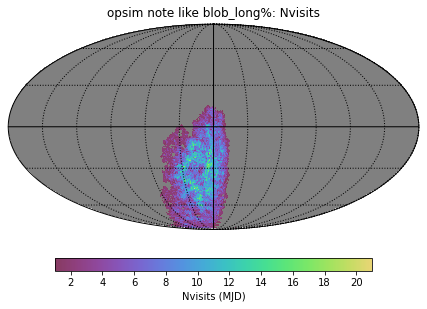

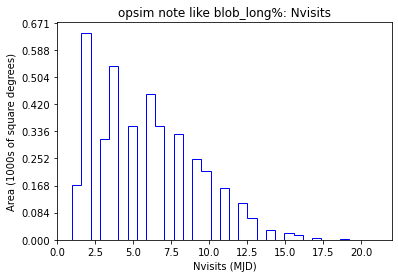

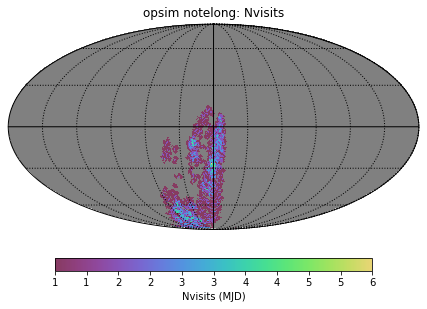

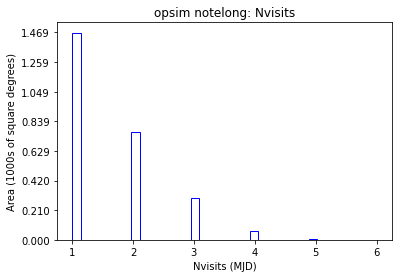

In [5]:
bg.runAll()
bg.plotAll(closefigs=False)